<a href="https://colab.research.google.com/github/Yul4ita/DA-course-/blob/main/%D0%94%D0%BE%D0%BC%D0%B0%D1%88%D0%BD%D1%94_%D0%B7%D0%B0%D0%B2%D0%B4%D0%B0%D0%BD%D0%BD%D1%8F_%E2%84%963_Python_%2B_SQL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Завдання на використання SQL в Python

1.Встановіть бібліотеку `mysql-connector-python` через pip aбо через conda.

In [3]:
!pip install mysql-connector-python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 35.8 MB/s eta 0:00:00


2.В змінній `con` створіть підключення до бази даних employees за аналогією того, як це робилось в лекції:

In [79]:
import mysql.connector
from mysql.connector import (connection)
import datetime

con = connection.MySQLConnection(user='user1', password='7oygWy6P',
host='3.68.62.36',
database='employees')

3.Виберіть максимальну і мінімальну дати найму співробітників використовуючи `con.cursor()`. Аби отримати результати в кінці, виконайте `cursor.fetchall()`.

In [ ]:
cursor = con.cursor()
sql = """
SELECT max(hire_date), min(hire_date)
FROM employees;
"""
cursor.execute(sql)
cursor.fetchall()

[(datetime.date(2000, 1, 28), datetime.date(1985, 1, 1))]

Очікуваний результат:  
    `[(datetime.date(2000, 1, 28), datetime.date(1985, 1, 1))]`

4.Давайте зберемо інформацію про останню ЗП кожного співробіткника в базі. З використанням `con.cursor()` виберіть з таблиці `salaries` для кожного співробітника його номер, останню в базі даних (тобто ту, що відповідає найновішій `to_date`) ЗП, та значення `from_date`, `to_date` для цієї ЗП.

Результати запишіть у pandas DataFrame, який збережіть у змінну `res`. Як взяти з курсора назви колонок - вже наведено. На екран виведіть назви колонок в змінній `res`, розмір цього датафрейму та перші 3 записи в ньому.

УВАГА! Зверніть увагу, що ЗП може оновлюватись протягом одного дня, тобто є випадки, коли апдейт ЗП був в певний день, скажімо 2001-01-01 і потім стався ще один апдейт ЗП цьому співробітнику цього самого дня. Запит має це враховувати.
Також, теоретично ЗП може бути зменшена. Тож, брати дату з максимальною ЗП буде неправильно з точки зору бізнес логіки. Треба саме останнє історичне значення ЗП кожного співробітника.

In [6]:
import pandas as pd

In [69]:
cursor = con.cursor()
sql = """ SELECT s1.emp_no, s1.salary, s1.to_date, s1.from_date
FROM salaries s1
JOIN (
    SELECT emp_no, MAX(to_date) as max_to_date
    FROM salaries
    GROUP BY emp_no
    ) s2
ON s1.emp_no = s2.emp_no AND s1.to_date = s2.max_to_date
ORDER BY s1.emp_no;
"""
cursor.execute(sql)
res = cursor.fetchall()
field_names = [i[0] for i in cursor.description]
res = pd.DataFrame(res, columns=field_names)
pd.DataFrame.columns = res.columns
print(res.columns)
print(res.shape)
print(res.head(3))

Index(['emp_no', 'salary', 'to_date', 'from_date'], dtype='object')
(300180, 4)
   emp_no  salary     to_date   from_date
0   10001   88958  9999-01-01  2002-06-22
1   10002   72527  9999-01-01  2001-08-02
2   10003   43311  9999-01-01  2001-12-01


АБО СПРОБУВАЛА ЧЕРЕЗ FATCHMANY(3), але тоді це не підійде для наступного завдання


In [65]:
cursor = con.cursor()
sql = """ SELECT s1.emp_no, s1.salary, s1.to_date, s1.from_date
FROM salaries s1
JOIN (
    SELECT emp_no, MAX(to_date) as max_to_date
    FROM salaries
    GROUP BY emp_no
    ) s2
ON s1.emp_no = s2.emp_no AND s1.to_date = s2.max_to_date
ORDER BY s1.emp_no;
"""
cursor.execute(sql)
res = cursor.fetchmany(3)
field_names = [i[0] for i in cursor.description]
res = pd.DataFrame(res, columns=field_names)
print(res)

   emp_no  salary     to_date   from_date
0   10001   88958  9999-01-01  2002-06-22
1   10002   72527  9999-01-01  2001-08-02
2   10003   43311  9999-01-01  2001-12-01


Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1lNvzbAebtkj3C2v-I5AE6HkMH8MTI1kA)

5.В утвореній вибірці в змінній `res` скільки значень `to_date` рівні `9999-01-01`, а скільки - ні? Увага! Для виконання цього завдання важливо розуміти, який тип даних у значень колонки `to_date`. Зʼясуйте це, і потім напишіть фільтр для виводу потрібного результату.

In [75]:
print(res.to_date.value_counts())

to_date
9999-01-01    240124
2000-01-19        36
2000-07-15        35
2000-05-31        34
2001-05-24        33
               ...  
1985-06-08         1
1989-11-11         1
1988-05-16         1
1987-11-07         1
1987-08-25         1
Name: count, Length: 5879, dtype: int64


In [82]:
from datetime import date

target_date = date(9999, 1, 1)
count_equal = res[res['to_date'] == target_date].shape[0]
count_not_equal = res[res['to_date'] != target_date].shape[0]

print("Кількість значень to_date == 9999-01-01:", count_equal)
print("Кількість значень to_date != 9999-01-01:", count_not_equal)


Кількість значень to_date == 9999-01-01: 240124
Кількість значень to_date != 9999-01-01: 60056


6.Виведіть візуально розподіл (гістограму) зарплат співробітників, які досі працюють в компанії, використовуючи результат попереднього завдання. Співробітниками, які досі працюють в компанії вважаємо тих, в кого to_date має значення 9999-01-01. Обовʼязково підпишіть графік і вісі.

Ці три завдання - приклад, як нам може бути зручно витягнути дані з бази певним запитом, а потім використати витягнуту вибірку у Python для подальшого аналізу.

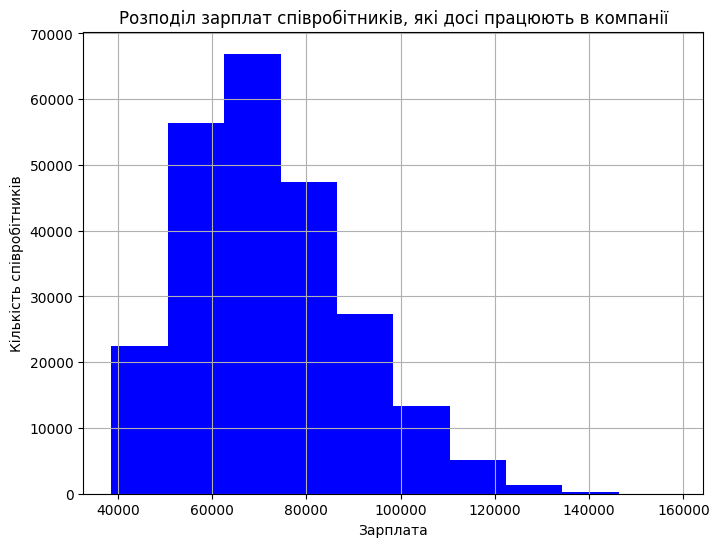

In [102]:
import matplotlib.pyplot as plt
from datetime import date
current_employees = res[res['to_date'] == date(9999, 1, 1)]

plt.figure(figsize=(8, 6))
plt.hist(current_employees['salary'], color='blue')

plt.title('Розподіл зарплат співробітників, які досі працюють в компанії')
plt.xlabel('Зарплата')
plt.ylabel('Кількість співробітників')
plt.grid()
plt.show()


Очікуваний результат:

![](https://drive.google.com/uc?export=view&id=1j8MHLC1E0revbQLM9B0UJs6tVEgoWhmK)

НЕ ЗАБУВАЄМО ЗАКРИТИ ПІДКЛЮЧЕННЯ ДО БАЗИ :)

In [ ]:
con.close()